## classify the Size_Categorie using SVM

- month	month of the year: 'jan' to 'dec'
- day	day of the week: 'mon' to 'sun'
- FFMC	FFMC index from the FWI system: 18.7 to 96.20
- DMC	DMC index from the FWI system: 1.1 to 291.3
- DC	DC index from the FWI system: 7.9 to 860.6
- ISI	ISI index from the FWI system: 0.0 to 56.10
- temp	temperature in Celsius degrees: 2.2 to 33.30
- RH	relative humidity in %: 15.0 to 100
- wind	wind speed in km/h: 0.40 to 9.40
- rain	outside rain in mm/m2 : 0.0 to 6.4
- Size_Categories-the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = 'forestfires.csv'
dataframe_train = pd.read_csv(filename)
dataframe_train

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [3]:
dataframe_train.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [4]:
dataframe_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [5]:
dataframe_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


# Data Preprocessing - Converting Categorical data into numerical data using label encoder

In [6]:
lb = LabelEncoder()

In [7]:
dataframe_train["month"] = lb.fit_transform(dataframe_train["month"])
dataframe_train["day"] = lb.fit_transform(dataframe_train["day"])
dataframe_train["size_category"] = lb.fit_transform(dataframe_train["size_category"])

In [8]:
dataframe_train

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


# EDA

In [9]:
dataframe_train[dataframe_train.isnull().any(axis=1)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category


In [10]:
dataframe_train.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [11]:
dataframe_train['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

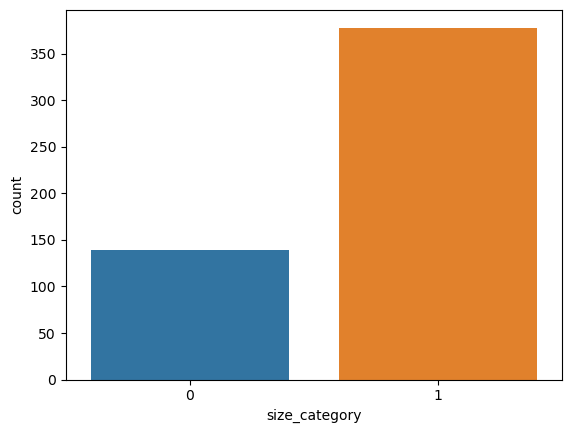

1    378
0    139
Name: size_category, dtype: int64

In [12]:
sns.countplot(x='size_category',data= dataframe_train)
plt.xlabel('size_category')
plt.ylabel('count')
plt.show()
dataframe_train['size_category'].value_counts()

<AxesSubplot:xlabel='temp', ylabel='area'>

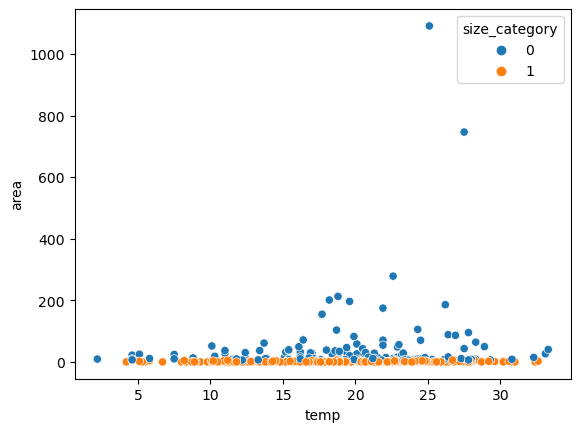

In [13]:
sns.scatterplot(dataframe_train['temp'],dataframe_train['area'],hue=dataframe_train['size_category'])

In [14]:
colnames=dataframe_train.columns
colnames

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [15]:
array=dataframe_train.values
X = array[:,0:11]
Y = array[:,11]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [18]:
from sklearn.preprocessing import minmax_scale

In [19]:
x_train = minmax_scale(x_train)
y_train = minmax_scale(y_train)
x_test = minmax_scale(x_test)
y_test = minmax_scale(y_test)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((361, 11), (361,), (156, 11), (156,))

In [21]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [22]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7783033033033033)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
clf = SVC(C= 13,gamma = 0.5)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 84.61538461538461


array([[ 21,  22],
       [  2, 111]], dtype=int64)